# How long have I been watching Netflix?
The purpose of this exercise is to understand how much time we have spent watching the office on Netflix.

In [10]:
import pandas as pd

view_act_df = pd.read_csv('../netflix-report/Content_Interaction/ViewingActivity.csv', encoding="utf-8")
view_act_df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Kids,2020-11-15 00:32:55,00:05:17,NaN,The Spy Next Door,NaN,Roku Amarillo4K Set Top Box,00:12:42,00:12:42,US (United States)
1,Kids,2020-11-15 00:32:11,00:00:27,Autoplayed: user action: None;,The Spy Next Door_hook_primary_16x9,HOOK,Roku Amarillo4K Set Top Box,00:00:27,00:00:27,US (United States)
2,Kids,2020-11-15 00:30:48,00:01:16,Autoplayed: user action: None;,The A List (Trailer),TRAILER,Roku Amarillo4K Set Top Box,00:01:16,00:01:16,US (United States)
3,Kids,2020-11-15 00:30:18,00:00:25,Autoplayed: user action: None;,Season 1 Trailer 3: Raising Dion,TRAILER,Roku Amarillo4K Set Top Box,00:00:25,00:00:25,US (United States)
4,Kids,2020-11-15 00:28:11,00:01:57,NaN,The Indian in the Cupboard,NaN,Roku Amarillo4K Set Top Box,00:01:57,00:01:57,US (United States)


In [11]:
view_act_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24804 entries, 0 to 24803
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             24804 non-null  object
 1   Start Time               24804 non-null  object
 2   Duration                 24804 non-null  object
 3   Attributes               9528 non-null   object
 4   Title                    24804 non-null  object
 5   Supplemental Video Type  3650 non-null   object
 6   Device Type              24559 non-null  object
 7   Bookmark                 24804 non-null  object
 8   Latest Bookmark          24804 non-null  object
 9   Country                  24804 non-null  object
dtypes: object(10)
memory usage: 1.9+ MB


As we can see the above Duration column is in a string object. In order to get a total time spent viewing each show we need to convert the duration to a time object.

There's also a lof to columns we don't need. We are only interested in the Shows and the Time columns. Let's drop the unnecessary columns.

In [12]:
drop_cols = ["Profile Name", "Attributes", "Supplemental Video Type", "Device Type", "Bookmark", "Latest Bookmark", "Country"]
df = view_act_df.drop(drop_cols, axis=1)
df.head()

,Start Time,Duration,Title
0,2020-11-15 00:32:55,00:05:17,The Spy Next Door
1,2020-11-15 00:32:11,00:00:27,The Spy Next Door_hook_primary_16x9
2,2020-11-15 00:30:48,00:01:16,The A List (Trailer)
3,2020-11-15 00:30:18,00:00:25,Season 1 Trailer 3: Raising Dion
4,2020-11-15 00:28:11,00:01:57,The Indian in the Cupboard


Let's convert out `Start Time` column to a datetime object

In [13]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df['Start Time']

0       2020-11-15 00:32:55+00:00
1       2020-11-15 00:32:11+00:00
2       2020-11-15 00:30:48+00:00
3       2020-11-15 00:30:18+00:00
4       2020-11-15 00:28:11+00:00
                   ...           
24799   2009-05-16 08:18:12+00:00
24800   2009-05-09 07:12:09+00:00
24801   2009-05-05 04:55:06+00:00
24802   2009-05-04 06:14:48+00:00
24803   2009-05-03 02:44:05+00:00
Name: Start Time, Length: 24804, dtype: datetime64[ns, UTC]

Now we need to convert the datetime object to our current Time Zone. We're going to use US/Easter time. In order to do this we're going to use the `DateTime.tz_convert()` function. In order to use this function, `Start Time` must be set as the index of the DF. We'll use `Dataframe.set_index()` to achieve this.

In [14]:
df = df.set_index('Start Time')

In [15]:
df.index = df.index.tz_convert('US/Eastern')

In [16]:
df = df.reset_index()

In [17]:
df.head()

,Start Time,Duration,Title
0,2020-11-14 19:32:55-05:00,00:05:17,The Spy Next Door
1,2020-11-14 19:32:11-05:00,00:00:27,The Spy Next Door_hook_primary_16x9
2,2020-11-14 19:30:48-05:00,00:01:16,The A List (Trailer)
3,2020-11-14 19:30:18-05:00,00:00:25,Season 1 Trailer 3: Raising Dion
4,2020-11-14 19:28:11-05:00,00:01:57,The Indian in the Cupboard


Now that we have our `Start Time` converted, we need to do the same to `Duration`. The difference between these columns is `Start Time` represents a particular date-time whereas `Duration` represents a change in two date-times or a TimeDelta object. We'll need to convert `Duration` to a TimeDelta object. This is achieved in a similar fashion using `pd.to_timedelta()`

In [18]:
df['Duration'] = pd.to_timedelta(df['Duration'])

In [19]:
df

,Start Time,Duration,Title
0,2020-11-14 19:32:55-05:00,0 days 00:05:17,The Spy Next Door
1,2020-11-14 19:32:11-05:00,0 days 00:00:27,The Spy Next Door_hook_primary_16x9
2,2020-11-14 19:30:48-05:00,0 days 00:01:16,The A List (Trailer)
3,2020-11-14 19:30:18-05:00,0 days 00:00:25,Season 1 Trailer 3: Raising Dion
4,2020-11-14 19:28:11-05:00,0 days 00:01:57,The Indian in the Cupboard
...,...,...,...
24799,2009-05-16 04:18:12-04:00,0 days 00:57:41,Katt Williams: Live
24800,2009-05-09 03:12:09-04:00,0 days 01:54:23,Traitor
24801,2009-05-05 00:55:06-04:00,0 days 01:50:03,The Illusionist
24802,2009-05-04 02:14:48-04:00,0 days 01:19:31,Katt Williams: American Hustle (The Movie)


Let's do a quick sum of our `Duration` column for total time.

In [20]:
total_time = df['Duration'].sum()
print(total_time)

290 days 22:17:29


In [21]:
th_df = df[df['Title'].str.contains('Terrace House')]
th_df

,Start Time,Duration,Title
7718,2020-05-01 16:47:00-04:00,0 days 00:31:35,Terrace House: Boys & Girls in the City: Part ...
7721,2020-05-01 16:16:04-04:00,0 days 00:30:31,Terrace House: Boys & Girls in the City: Part ...
7722,2020-05-01 16:15:16-04:00,0 days 00:00:34,Terrace House: Boys & Girls in the City: Part ...
7723,2020-05-01 16:12:55-04:00,0 days 00:00:10,Terrace House: Boys & Girls in the City: Part ...
7724,2020-05-01 14:48:10-04:00,0 days 00:35:33,Terrace House: Boys & Girls in the City: Part ...
...,...,...,...
20993,2017-07-30 15:17:03-04:00,0 days 00:30:42,Terrace House: Aloha State: Part 2: Black Tear...
20995,2017-07-30 04:33:14-04:00,0 days 00:00:01,Terrace House: Aloha State: Part 1: Taste of C...
20996,2017-07-30 04:02:34-04:00,0 days 00:29:56,Terrace House: Aloha State: Part 1: Taste of C...
21583,2017-05-06 23:55:26-04:00,0 days 00:35:38,Terrace House: Aloha State: Part 1: The 18-Yea...


In [22]:
th_total_time = th_df['Duration'].sum()

In [23]:
print(type(th_total_time))
print(th_total_time)

<class 'pandas._libs.tslibs.timedeltas.Timedelta'>
11 days 08:38:10


In [24]:
th_hours = (th_total_time.days*24 + th_total_time.seconds/60/60)
print(th_hours)

272.6361111111111


In [25]:
df['Seconds'] = df['Duration'].dt.seconds
print(type(df['Seconds']))
df['Minutes'] = df['Seconds']/60

<class 'pandas.core.series.Series'>


In [26]:
pivot = df.pivot_table(index='Title', values='Minutes')
pivot

,Minutes
Title,
#Alive_hook_01_16x9,0.333333
#blackAF: Season 1: because of slavery (Episode 1),16.925000
#blackAF: Season 1: because of slavery too (Episode 2),33.000000
#blackAF: Season 1: still... because of slavery (Episode 3),31.983333
"#blackAF: Season 1: yup, you guessed it. again, this is because of slavery (Episode 4)",0.283333
...,...
the goop lab with Gwyneth Paltrow: Season 1: Cold Comfort (Episode 2),0.250000
the goop lab with Gwyneth Paltrow: Season 1: The Energy Experience (Episode 5),27.483333
the goop lab with Gwyneth Paltrow: Season 1: The Healing Trip (Episode 1),34.916667


How do we begin to clean our column names? We have shows Names combined with Episodes.

In [27]:
df['Title'].head()

0                      The Spy Next Door
1    The Spy Next Door_hook_primary_16x9
2                   The A List (Trailer)
3       Season 1 Trailer 3: Raising Dion
4             The Indian in the Cupboard
Name: Title, dtype: object

In [28]:
df['Title'].tail()

24799                           Katt Williams: Live
24800                                       Traitor
24801                               The Illusionist
24802    Katt Williams: American Hustle (The Movie)
24803                Walk Hard: The Dewey Cox Story
Name: Title, dtype: object

In [29]:
df['Title'].unique()

array(['The Spy Next Door', 'The Spy Next Door_hook_primary_16x9',
       'The A List (Trailer)', ..., 'The Illusionist',
       'Katt Williams: American Hustle (The Movie)',
       'Walk Hard: The Dewey Cox Story'], dtype=object)

In [30]:
df.shape

(24804, 5)

OK so we've played around a lot let's actually do some cool manipulation to our dataset.

In [31]:
print(df.columns)

Index(['Start Time', 'Duration', 'Title', 'Seconds', 'Minutes'], dtype='object')


Let's take a look at the `Start Time` column.

In [32]:
print(df['Start Time'].describe())

count                         24804
unique                        24765
top       2009-06-06 21:28:50-04:00
freq                              2
first     2009-05-02 22:44:05-04:00
last      2020-11-14 19:32:55-05:00
Name: Start Time, dtype: object


<ipython-input-32-1a9feae5cfa3>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df['Start Time'].describe())


Let's extract day of the week and add it to our dataframe object.

In [33]:
print(type(df['Start Time'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [34]:
df['day'] = df['Start Time'].dt.weekday
df['hour'] = df['Start Time'].dt.hour

In [35]:
df['day'].head()

0    5
1    5
2    5
3    5
4    5
Name: day, dtype: int64

In [36]:
%matplotlib inline
import matplotlib

In [37]:
df['day'] = pd.Categorical(df['day'], categories = [0,1,2,3,4,5,6], ordered=True)
df['day'].head()

0    5
1    5
2    5
3    5
4    5
Name: day, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

In [38]:
df['day'].tail()

24799    5
24800    5
24801    1
24802    0
24803    5
Name: day, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

<AxesSubplot:title={'center':'Days of Watching Netflix'}>

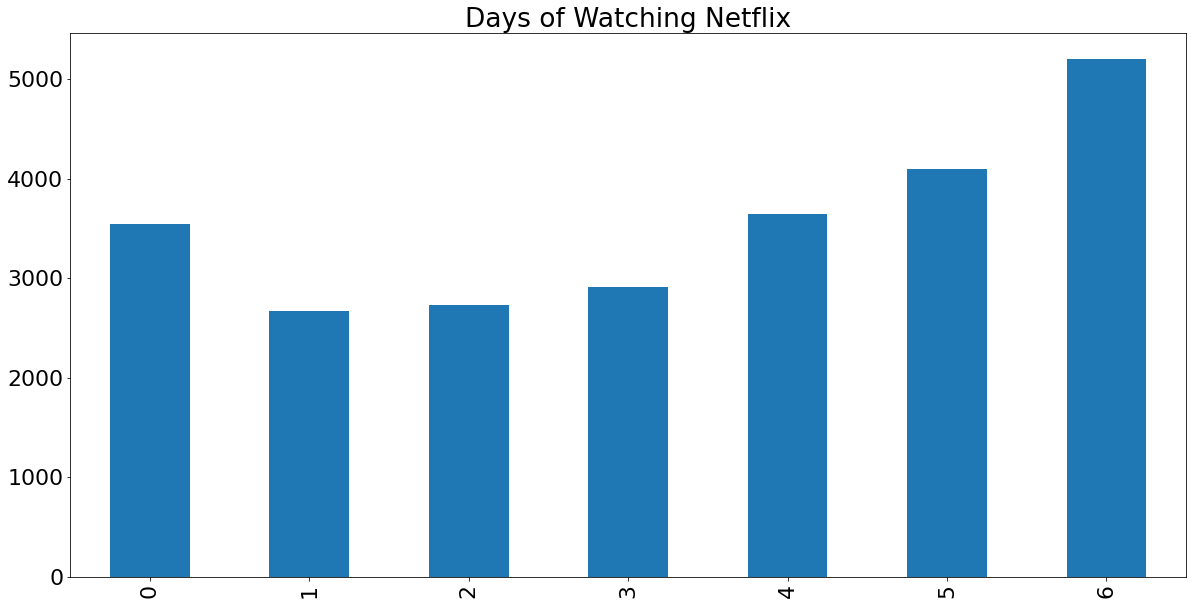

In [39]:
df_by_day = df['day'].value_counts()
df_by_day = df_by_day.sort_index()
matplotlib.rcParams.update({'font.size': 22})
df_by_day.plot(kind='bar', figsize=(20,10), title="Days of Watching Netflix")

Let's do the same thing with hours of the day.

In [40]:
hour_list = [n for n in range(24)]
print(hour_list)
df['hour'] = pd.Categorical(df['hour'], categories=hour_list, ordered=True)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [41]:
netflix_by_hour = df['hour'].value_counts()
netflix_by_hour = netflix_by_hour.sort_index()
matplotlib.rcParams.update({'font.size': 22})

<AxesSubplot:>

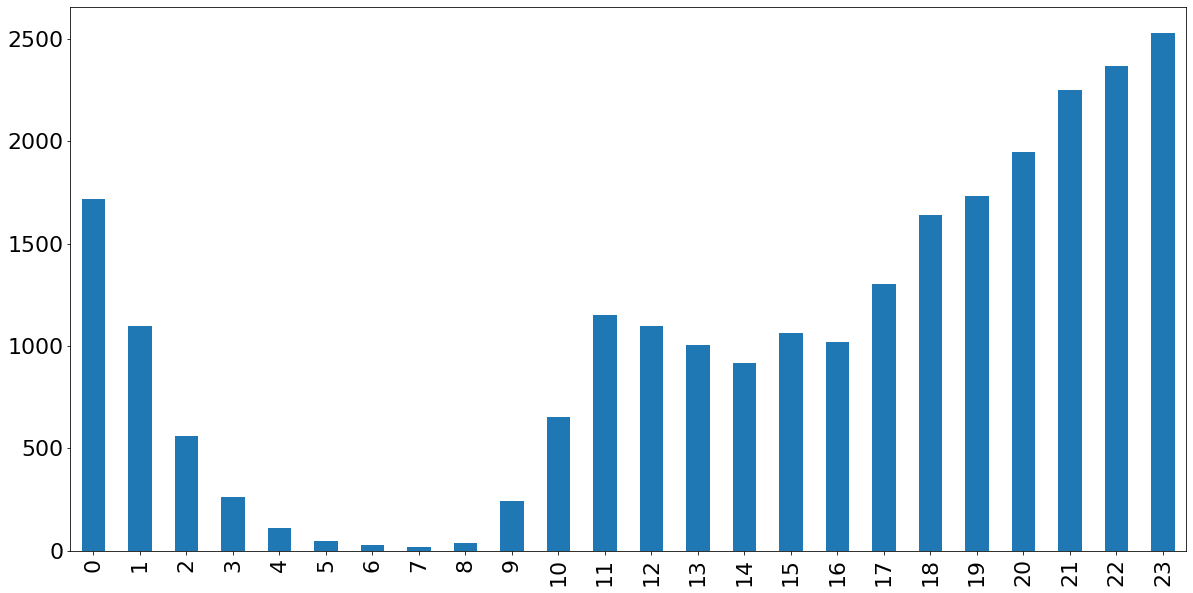

In [42]:
netflix_by_hour.plot(kind='bar', figsize=(20,10), title="")